![](https://www.winet.dcc.ufmg.br/wp-content/uploads/2019/09/dcc.gif)

## Universidade Federal de Minas Gerais 
## ICEX - Departamento de Ciência de Computação

### Trabalho de Aprendizado de Máquina 
 
##### Professor Dr. Adriano Veloso 
###### Aluno: Jesimon Barreto Santos - 2016070093

### Imports and Instalações

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from copy import copy
import statistics as sts
import scipy.stats as st

#!pip install pandas
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.manifold import TSNE

#Import methods
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier



### Carregar dados e preprocessamento 

Abaixo é encontrado o código de carregamento e preprocessamento do dado. Inicialmente é carregado em formato 'dataframe' da biblioteca pandas. Depois é separado em caracteristicas e anotações, por último dividido em 5 folds.

In [2]:
#Carrega os dados
data = pd.read_csv('koi_data.csv')
#retira os nomes dos possiveis planetas, não serão utilizados
name = data.pop('kepoi_name').values
# retirando a anotação
y = data.pop('koi_disposition').values
#Codificando a anotação para treinar modelos
labelencoder = LabelEncoder()
y_transf = labelencoder.fit_transform(y)
#Pegando apenas as features de cada amostra para treinar
X = data.values
print(X)
#Dividindo em 5 partes de treino e teste, ou seja, 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=123)
for train, test in kf.split(X):
    print("TRAIN:", train.shape, "TEST:", test.shape)

[[ 9.48804  0.146    2.9575  ...  0.08     0.31     0.32   ]
 [54.41838  0.586    4.507   ...  0.49     0.12     0.5    ]
 [ 1.73695  1.276    2.40641 ... -0.257    0.099    0.276  ]
 ...
 [ 0.5277   1.252    3.2221  ...  2.344   -1.756    2.929  ]
 [ 0.6814   0.147    0.865   ...  3.38    -3.89     5.16   ]
 [ 4.85603  0.134    3.078   ...  0.96     3.4      3.5    ]]
TRAIN: (4161,) TEST: (1041,)
TRAIN: (4161,) TEST: (1041,)
TRAIN: (4162,) TEST: (1040,)
TRAIN: (4162,) TEST: (1040,)
TRAIN: (4162,) TEST: (1040,)


### Plot e visualização de dados
Foi reduzida a dimensionalidade das características utilizando TSNE e plotado em 2D e 3D. O objetivo é visualizar os dados nessas dimensões. Percebe-se que não são divisíveis nessas dimensões.

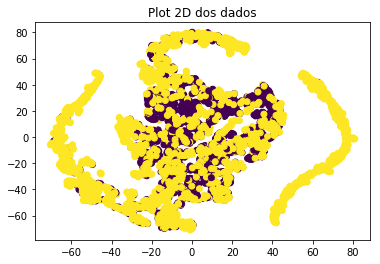

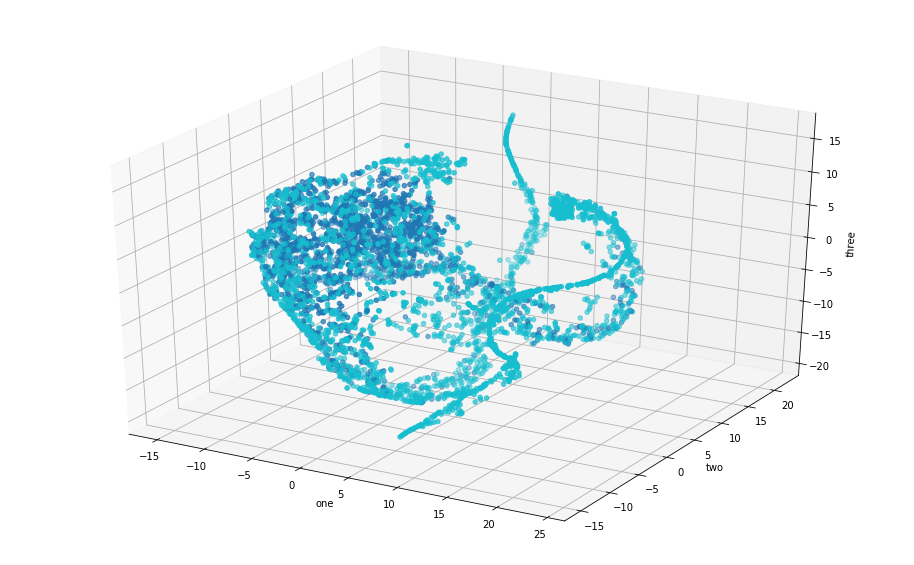

In [3]:
#calculando TSNE para 2 dimensões e para 3 dimensões
#####Pode demorar um pouco
ts_d2 = TSNE(n_components=2).fit_transform(X)
ts_d3 = TSNE(n_components=3).fit_transform(X)
plt.scatter(*zip(*ts_d2[:,:2]), c = y_transf)
plt.title('Plot 2D dos dados')
plt.show()

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(xs=ts_d3[:,0], ys=ts_d3[:,1], zs=ts_d3[:,2], c=y_transf, cmap='tab10')
ax.set_xlabel('one')
ax.set_ylabel('two')
ax.set_zlabel('three')
plt.show()


## Execução e análise dos algoritmos
A partir dessa célula serão apresentadas as execuções e as análises dos algoritmos. Também foi gerado uma curva ROC por algoritmo, com objetivo de avaliar o desempenho de cada hiperparâmetro.

Serão apresentados gráficos com base em acuracia, precisão, revocação e curva ROC. Abaixo estão listadas essas métricas com explicação sobre o que representão e como fazer a leitura.

- Acuracia - Acuracia é a métrica relacionada a quantidade de acertos. Essa métrica é dada pela razão da quantidade de acertos pela quantidade total de predições. 
- Precisão - Tem a ver com a dispersão das respostas do classificador em relação aos dados preditos. Se a dispersão for menor, indica que o classificador está mais 'certo' de suas respostas. É dado pela razão entre a quantidade de vezes que foi predito verdade pela quantidade de vezes que foi predito verdade corretamente. 
- Revocação - Tem a ver com a taxa de acertos na classe positivo. É dado pela razão entre os valores positivos no teste pela quantidade de acertos na classe positivo.

Todas as métricas anteriores vão de 0 a 1 ou de 0% a 100%, e quanto maior o valor, melhor é o classificado.

- ROC (Receiver Operating Characteristic) - Indica quão bem um modelo consegue distinguir entre duas classes(positivo e negativo). 
- AUC - A auc é a área embaixo da curva ROC. Essa métrica vai de 0 a 1, o valor de 0.5 indica que a probabilidade do clasificador acertar é de 50%. Esse valor é marcado nos gráficos da ROC como a reta que vai da cordenada (0,0) ao (1,1). Isso serve de referência para as outras curvas. 

Quanto mais alta a curva e mais para esquerda no gráfico melhor. O classificador perfeito seria uma curva composta por duas retas, uma que vai da origem até (0,1), e a segunda reta vai desse ponto até o (1,1).



In [3]:
#Listas que serão usadas na concusão. Serão salvos os melhores resultados de cada modelo.
methods = ['Naive Bayes', 'Árvore de decisão', 'SVM', 'KNN', 'Random Forest', 'Gradient Tree Boosting']
acc_conc, pre_conc, rec_conc, roc_conc = [], [], [], []

### Naive Bayes Gaussian

O algoritmo de Naive Bayes é baseado no teorema de Bayes, encontra uma probabilidade da algo acontecer baseando-se no fato que algum evento ocorreu. Nesse trabalho está sendo utilizado como valor de referência para acuracia, precisão e revocação.

Mean Accuracy[0.9162] IC [0.9070, 0.9254]
Mean Recall[0.9249] IC [0.9164, 0.9335]
Mean Precision[0.9115] IC [0.9012, 0.9218]


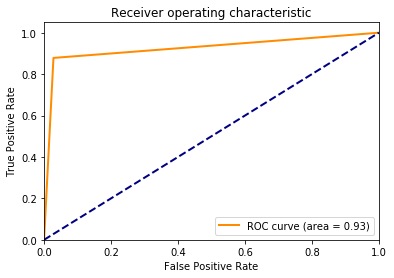

In [4]:
acc_final, recall_final, precision_final, y_true_f, y_pred_f = [],[],[],[],[]

for train_index, test_index in kf.split(X):
    #Dados da fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_true = y_transf[train_index], y_transf[test_index]
    #normalizando dados
    min_max_scaler = preprocessing.MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_test = min_max_scaler.transform(X_test)
    #criando classificador
    gnb = GaussianNB()
    #trainamento
    gnb.fit(X_train, y_train)
    #predição nos dados de teste
    y_pred = gnb.predict(X_test)
    #metricas
    acc = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    y_true_f.append(y_true)
    y_pred_f.append(y_pred)
    acc_final.append(acc)
    recall_final.append(recall)
    precision_final.append(precision)
#calculando intervalo de confiança
ic_acc = st.t.interval(0.9, len(acc_final) - 1, loc=np.mean(acc_final), scale=st.sem(acc_final))
ic_recall = st.t.interval(0.9, len(recall_final) - 1, loc=np.mean(recall_final), scale=st.sem(recall_final))
ic_pre = st.t.interval(0.9, len(precision_final) - 1, loc=np.mean(precision_final), scale=st.sem(precision_final))
acc_conc.append([np.mean(acc_final),ic_acc])
rec_conc.append([np.mean(recall_final),ic_recall])
pre_conc.append([np.mean(precision_final),ic_pre])
print('Mean Accuracy[{:.4f}] IC [{:.4f}, {:.4f}]'.format(np.mean(acc_final), ic_acc[0], ic_acc[1]))
print('Mean Recall[{:.4f}] IC [{:.4f}, {:.4f}]'.format(np.mean(recall_final), ic_recall[0], ic_recall[1]))
print('Mean Precision[{:.4f}] IC [{:.4f}, {:.4f}]'.format(np.mean(precision_final), ic_pre[0], ic_pre[1]))

y_pred = np.concatenate(y_pred_f, axis=0)
y_true = np.concatenate(y_true_f, axis=0)
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_conc.append([fpr,tpr])
auc_ = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()



### Decision Tree

Esse algorítmo é baseado em criar nós de decisão com base nas características, esse grupo de nós forma uma árvore. A cada grupo de nós em uma mesma hierarquia tomando como referencia o nó inicial é chamado de profundidade. Um grande problema desse método é o sobreajuste. Pois, dado um valor de profundidade suficientemente grande, esse método irá atingir erro 0 nos dados de treino, porém no teste o erro será maior. 

Pode-se perceber esse comportamento no gráfico de acurácia por profundidade. Nele é mostrado que a acurácia no traino e no teste crescem até certo ponto. Depois desse ponto a acuracia no treino chega a 100%, enquanto a accurácia no teste tende a diminuir.

O mesmo comportamento pode ser visto na curva ROC. Depois do valor de profundidade máxima igual a 5, o valor no é o mesmo.

Profundidade: 1
Mean Accuracy[0.7420] IC [0.7194, 0.7646]
Mean Recall[0.7650] IC [0.7587, 0.7713]
Mean Precision[0.7737] IC [0.7571, 0.7903]

Profundidade: 2
Mean Accuracy[0.8795] IC [0.8433, 0.9156]
Mean Recall[0.8775] IC [0.8289, 0.9261]
Mean Precision[0.8758] IC [0.8392, 0.9124]

Profundidade: 3
Mean Accuracy[0.9258] IC [0.9169, 0.9347]
Mean Recall[0.9276] IC [0.9173, 0.9380]
Mean Precision[0.9206] IC [0.9105, 0.9306]

Profundidade: 4
Mean Accuracy[0.9425] IC [0.9364, 0.9487]
Mean Recall[0.9436] IC [0.9361, 0.9510]
Mean Precision[0.9383] IC [0.9311, 0.9455]

Profundidade: 5
Mean Accuracy[0.9492] IC [0.9428, 0.9557]
Mean Recall[0.9496] IC [0.9418, 0.9575]
Mean Precision[0.9458] IC [0.9396, 0.9521]

Profundidade: 6
Mean Accuracy[0.9512] IC [0.9429, 0.9594]
Mean Recall[0.9529] IC [0.9449, 0.9609]
Mean Precision[0.9472] IC [0.9381, 0.9562]

Profundidade: 7
Mean Accuracy[0.9531] IC [0.9439, 0.9623]
Mean Recall[0.9550] IC [0.9462, 0.9637]
Mean Precision[0.9493] IC [0.9393, 0.9593]

Profun

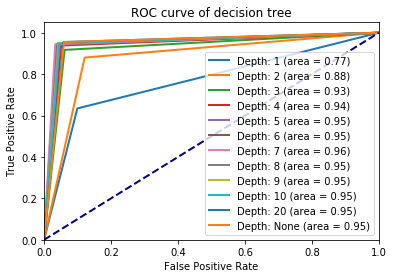

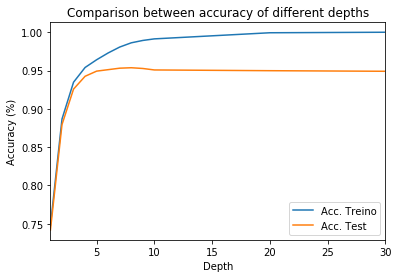

In [5]:
#Variáveis para salvar melhor resultado
max_acc, max_pre, max_rec, roc_max, prec_r = [], [], [], [], -1

depths = list(range(1,10))+list(range(10,31,10))
plt_train_acc, plt_test_acc = [],[]

for depth in depths:
    acc_final, recall_final, precision_final, y_true_f, y_pred_f = [],[],[],[],[]
    plt_train = []
    for train_index, test_index in kf.split(X):
        if depth == 30:
            depth = None
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_true = y_transf[train_index], y_transf[test_index]
        min_max_scaler = preprocessing.MinMaxScaler()
        X_train = min_max_scaler.fit_transform(X_train)
        X_test = min_max_scaler.transform(X_test)
        # Criando algoritmo
        clf = DecisionTreeClassifier(max_depth=depth)
        clf = clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        plt_train.append(accuracy_score(y_train, clf.predict(X_train)))
        acc = accuracy_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred, average='macro')
        precision = precision_score(y_true, y_pred, average='macro')
        y_true_f.append(y_true)
        y_pred_f.append(y_pred)
        acc_final.append(acc)
        recall_final.append(recall)
        precision_final.append(precision)
    print('Profundidade: {}'.format(depth))
    prec_mean = np.mean(precision_final)
    ic_acc = st.t.interval(0.9, len(acc_final) - 1, loc=np.mean(acc_final), scale=st.sem(acc_final))
    ic_recall = st.t.interval(0.9, len(recall_final) - 1, loc=np.mean(recall_final), scale=st.sem(recall_final))
    ic_pre = st.t.interval(0.9, len(precision_final) - 1, loc=prec_mean, scale=st.sem(precision_final))
    print('Mean Accuracy[{:.4f}] IC [{:.4f}, {:.4f}]'.format(np.mean(acc_final), ic_acc[0], ic_acc[1]))
    print('Mean Recall[{:.4f}] IC [{:.4f}, {:.4f}]'.format(np.mean(recall_final), ic_recall[0], ic_recall[1]))
    print('Mean Precision[{:.4f}] IC [{:.4f}, {:.4f}]\n'.format(prec_mean, ic_pre[0], ic_pre[1]))
    plt_train_acc.append(sts.mean(plt_train))
    plt_test_acc.append(sts.mean(acc_final))
    y_pred = np.concatenate(y_pred_f, axis=0)
    y_true = np.concatenate(y_true_f, axis=0)
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc_ = auc(fpr, tpr)
    
    if prec_mean > prec_r:
        prec_r = prec_mean
        max_acc, max_pre, max_rec, roc_max = [np.mean(acc_final),ic_acc], [prec_mean, ic_pre], [np.mean(recall_final), ic_recall], [fpr,tpr]
    
    lw = 2
    plt.plot(fpr, tpr,lw=lw, label='Depth: '+str(depth)+' (area = %0.2f)' %auc_)

acc_conc.append(max_acc)
rec_conc.append(max_rec)
pre_conc.append(max_pre)
roc_conc.append(roc_max)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of decision tree')
plt.legend(loc="lower right")
plt.show()

fig, ax = plt.subplots()
ax.plot(depths, plt_train_acc, label='Acc. Treino')
ax.plot(depths, plt_test_acc, label='Acc. Test')
plt.xlim([min(depths), max(depths)])
ax.set(xlabel='Depth', ylabel='Accuracy (%)',
       title='Comparison between accuracy of different depths')
plt.legend(loc="lower right")

plt.show()


### Support Vector Machine

Para avaliar esses resultados é necessário entender como funciona a utilização dos kernels utilizados no método.

- O kernel linear faz a separação baseado em hiperplanos sem curvatura. Visualizando em 2D seria uma reta.

- kernel Sigmoid tem uma superficie com poucas curvaturas.

- kernel Polinomial tem uma superficie de separação que depende do grau do polinomio estabelecido. Nesse caso, é necessário ter cuidado ao estabelecer um grau muito alto que pode ter o efeito de sobreajuste, pois um polinomio de grau suficientemente grande pode aproximar qualquer função, isso faz com que se adapte demais aos dados de treino.

- kernel RBF utiliza funções baseadas em distancia radial, ou seja, a superficie de separação tem formato eliptico com centro na concentração de amostras de uma classe.

Com base nisso, percebe-se o kernel linear já consegue ter um resultado muito bom nos dados, igualando ao naive bayes. O RBF tem o segundo melhor resultado, o kenerl sigmoid e o polinomial de grau maior que 1 demonstram comportamento de sobreajuste.  

Kernel: linear
Mean Accuracy[0.9139] IC [0.9012, 0.9266]
Mean Recall[0.9172] IC [0.9043, 0.9300]
Mean Precision[0.9083] IC [0.8939, 0.9228]

Kernel: sigmoid
Mean Accuracy[0.7805] IC [0.7299, 0.8310]
Mean Recall[0.7448] IC [0.6797, 0.8100]
Mean Precision[0.8005] IC [0.7620, 0.8390]

Kernel: poly
Mean Accuracy[0.7861] IC [0.7354, 0.8367]
Mean Recall[0.7529] IC [0.6874, 0.8184]
Mean Precision[0.8029] IC [0.7630, 0.8429]

Kernel: rbf
Mean Accuracy[0.8376] IC [0.8080, 0.8671]
Mean Recall[0.8241] IC [0.7847, 0.8636]
Mean Precision[0.8371] IC [0.8073, 0.8670]



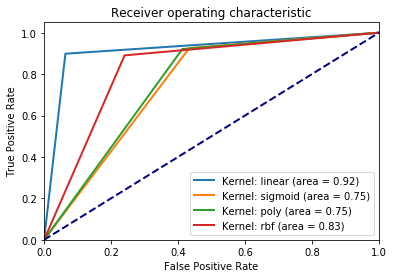

In [6]:
#Variáveis para salvar melhor resultado
max_acc, max_pre, max_rec, roc_max, prec_r = [], [], [], [], -1


kernels = ['linear', 'sigmoid', 'poly', 'rbf']
for knl in kernels:
    acc_final, recall_final, precision_final, y_true_f, y_pred_f = [],[],[],[],[]
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_true = y_transf[train_index], y_transf[test_index]
        min_max_scaler = preprocessing.MinMaxScaler()
        X_train = min_max_scaler.fit_transform(X_train)
        X_test = min_max_scaler.transform(X_test)
        if knl == 'poly':
            clf = svm.SVC(kernel=knl, degree=1)
        else:
            clf = svm.SVC(kernel=knl)
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred, average='macro')
        precision = precision_score(y_true, y_pred, average='macro')
        y_true_f.append(y_true)
        y_pred_f.append(y_pred)
        acc_final.append(acc)
        recall_final.append(recall)
        precision_final.append(precision)
        
    print('Kernel: {}'.format(knl))
    prec_mean = np.mean(precision_final)
    ic_acc = st.t.interval(0.9, len(acc_final) - 1, loc=np.mean(acc_final), scale=st.sem(acc_final))
    ic_recall = st.t.interval(0.9, len(recall_final) - 1, loc=np.mean(recall_final), scale=st.sem(recall_final))
    ic_pre = st.t.interval(0.9, len(precision_final) - 1, loc=np.mean(precision_final), scale=st.sem(precision_final))
    print('Mean Accuracy[{:.4f}] IC [{:.4f}, {:.4f}]'.format(np.mean(acc_final), ic_acc[0], ic_acc[1]))
    print('Mean Recall[{:.4f}] IC [{:.4f}, {:.4f}]'.format(np.mean(recall_final), ic_recall[0], ic_recall[1]))
    print('Mean Precision[{:.4f}] IC [{:.4f}, {:.4f}]\n'.format(np.mean(precision_final), ic_pre[0], ic_pre[1]))
    y_pred = np.concatenate(y_pred_f, axis=0)
    y_true = np.concatenate(y_true_f, axis=0)
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc_ = auc(fpr, tpr)
    if prec_mean > prec_r:
        prec_r = prec_mean
        max_acc, max_pre, max_rec, roc_max = [np.mean(acc_final),ic_acc], [prec_mean, ic_pre], [np.mean(recall_final), ic_recall], [fpr,tpr]
    lw = 2
    plt.plot(fpr, tpr,lw=lw, label='Kernel: '+knl+' (area = %0.2f)' %auc_)

acc_conc.append(max_acc)
rec_conc.append(max_rec)
pre_conc.append(max_pre)
roc_conc.append(roc_max)  
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### KNN

Esse algoritmo faz comparação de distancia dos vetores no espaço de caracteristicas e verifica quais os k vetores tem menor distância. A partir desses k vizinhos mais próximos, caracteriza com a classe que tem maior quantidade dentre esses k selecionados. Dessa maneira, o parametro k é muito importante e varia de dado para dado.
Mesmo aumentando o número de vizinhos o valor não se altera tanto, indica que as duas classes estão igualmente distribuidas em certa parte do espaço, como visto na figura inicial de plot dos dados em 2D e 3D. O melhor valor é com k igual a 10.


k: 1
Mean Accuracy[0.7647] IC [0.7535, 0.7759]
Mean Recall[0.7616] IC [0.7530, 0.7702]
Mean Precision[0.7568] IC [0.7435, 0.7700]

k: 2
Mean Accuracy[0.7486] IC [0.7306, 0.7665]
Mean Recall[0.7693] IC [0.7560, 0.7827]
Mean Precision[0.7627] IC [0.7476, 0.7778]

k: 3
Mean Accuracy[0.7805] IC [0.7749, 0.7861]
Mean Recall[0.7782] IC [0.7744, 0.7820]
Mean Precision[0.7726] IC [0.7646, 0.7806]

k: 4
Mean Accuracy[0.7732] IC [0.7579, 0.7884]
Mean Recall[0.7857] IC [0.7738, 0.7977]
Mean Precision[0.7751] IC [0.7601, 0.7901]

k: 5
Mean Accuracy[0.7860] IC [0.7761, 0.7960]
Mean Recall[0.7860] IC [0.7787, 0.7933]
Mean Precision[0.7789] IC [0.7672, 0.7907]

k: 6
Mean Accuracy[0.7793] IC [0.7656, 0.7930]
Mean Recall[0.7895] IC [0.7798, 0.7991]
Mean Precision[0.7787] IC [0.7658, 0.7916]

k: 7
Mean Accuracy[0.7887] IC [0.7776, 0.7999]
Mean Recall[0.7897] IC [0.7806, 0.7989]
Mean Precision[0.7820] IC [0.7687, 0.7953]

k: 8
Mean Accuracy[0.7847] IC [0.7672, 0.8022]
Mean Recall[0.7937] IC [0.7802, 0.80

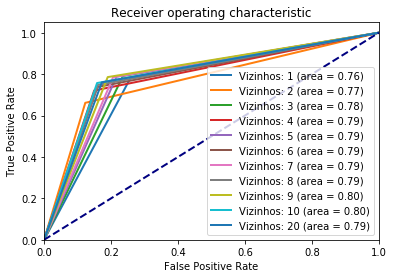

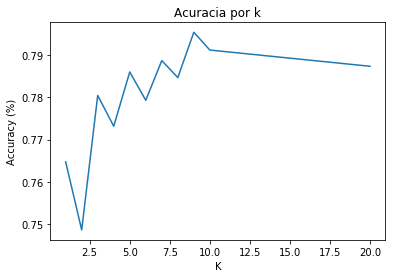

In [7]:
#Variáveis para salvar melhor resultado
max_acc, max_pre, max_rec, roc_max, prec_r = [], [], [], [], -1


nbs = list(range(1,10)) + list(range(10,21,10))
plt_train_acc = []
for nb in nbs:
    acc_final, recall_final, precision_final, y_true_f, y_pred_f = [],[],[],[],[]
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_true = y_transf[train_index], y_transf[test_index]
        clf = KNeighborsClassifier(n_neighbors=nb)
        clf = clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred, average='macro')
        precision = precision_score(y_true, y_pred, average='macro')
        y_true_f.append(y_true)
        y_pred_f.append(y_pred)
        acc_final.append(acc)
        recall_final.append(recall)
        precision_final.append(precision)
    
    print('k: {}'.format(nb))
    prec_mean = np.mean(precision_final)
    ic_acc = st.t.interval(0.9, len(acc_final) - 1, loc=np.mean(acc_final), scale=st.sem(acc_final))
    ic_recall = st.t.interval(0.9, len(recall_final) - 1, loc=np.mean(recall_final), scale=st.sem(recall_final))
    ic_pre = st.t.interval(0.9, len(precision_final) - 1, loc=np.mean(precision_final), scale=st.sem(precision_final))
    print('Mean Accuracy[{:.4f}] IC [{:.4f}, {:.4f}]'.format(np.mean(acc_final), ic_acc[0], ic_acc[1]))
    print('Mean Recall[{:.4f}] IC [{:.4f}, {:.4f}]'.format(np.mean(recall_final), ic_recall[0], ic_recall[1]))
    print('Mean Precision[{:.4f}] IC [{:.4f}, {:.4f}]\n'.format(np.mean(precision_final), ic_pre[0], ic_pre[1]))
    plt_train_acc.append(sts.mean(acc_final))
    y_pred = np.concatenate(y_pred_f, axis=0)
    y_true = np.concatenate(y_true_f, axis=0)
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc_ = auc(fpr, tpr)
    if prec_mean > prec_r:
        prec_r = prec_mean
        max_acc, max_pre, max_rec, roc_max = [np.mean(acc_final),ic_acc], [prec_mean, ic_pre], [np.mean(recall_final), ic_recall], [fpr,tpr]

    lw = 2
    plt.plot(fpr, tpr,lw=lw, label='Vizinhos: '+str(nb)+' (area = %0.2f)' %auc_)
    
acc_conc.append(max_acc)
rec_conc.append(max_rec)
pre_conc.append(max_pre)
roc_conc.append(roc_max)      
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

fig, ax = plt.subplots()
ax.plot(nbs, plt_train_acc)
ax.set(xlabel='K', ylabel='Accuracy (%)',
       title='Acuracia por k')
plt.show()

### Random Forest

Esse lgoritmo é baseado em várias árvores de decisão. Porém, cada ávore é treinada em uma parte de amostras selecionadas aleatoriamente. E a resposta final é dada com base na ponderação da resposta de todas as árvores. Isso faz com que reduza o problema de sobreajuste que as árvores de decisão enfrentam.
Dessa maneira, os experimentos mostram que uma árvore com a profundidade tem mais tendencias a sobreajuste que um algoritmo de random forest. Essa comparação é mostrado na conclusão, o Random Forest é mais robusto que árvore de decisão a sobreajuste. (Gerar gráfico de comparação entre arvore de decisão e floresta aleatoria)

Número de Árvores: 1
Mean Accuracy[0.9298] IC [0.9253, 0.9344]
Mean Recall[0.9272] IC [0.9222, 0.9321]
Mean Precision[0.9269] IC [0.9207, 0.9332]

Número de Árvores: 2
Mean Accuracy[0.9287] IC [0.9179, 0.9395]
Mean Recall[0.9345] IC [0.9247, 0.9443]
Mean Precision[0.9232] IC [0.9110, 0.9354]

Número de Árvores: 3
Mean Accuracy[0.9546] IC [0.9444, 0.9649]
Mean Recall[0.9526] IC [0.9402, 0.9650]
Mean Precision[0.9529] IC [0.9428, 0.9630]

Número de Árvores: 4
Mean Accuracy[0.9591] IC [0.9539, 0.9642]
Mean Recall[0.9599] IC [0.9542, 0.9656]
Mean Precision[0.9557] IC [0.9497, 0.9616]

Número de Árvores: 5
Mean Accuracy[0.9573] IC [0.9427, 0.9720]
Mean Recall[0.9540] IC [0.9379, 0.9701]
Mean Precision[0.9570] IC [0.9416, 0.9723]

Número de Árvores: 6
Mean Accuracy[0.9627] IC [0.9515, 0.9739]
Mean Recall[0.9630] IC [0.9518, 0.9742]
Mean Precision[0.9600] IC [0.9479, 0.9721]

Número de Árvores: 7
Mean Accuracy[0.9621] IC [0.9508, 0.9735]
Mean Recall[0.9597] IC [0.9468, 0.9725]
Mean Precision[

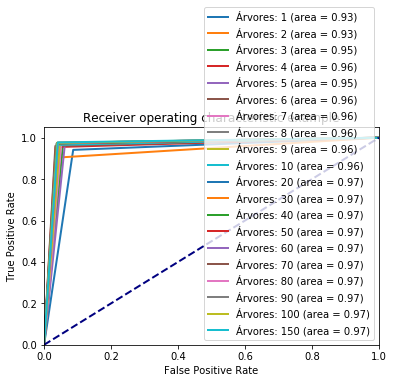

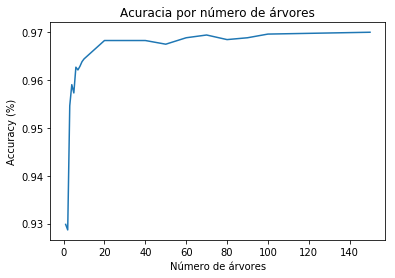

In [8]:
max_acc, max_pre, max_rec, roc_max, prec_r = [], [], [], [], -1

trees = list(range(1,10)) + list(range(10,101,10)) + [150]
#[1,2,3,4,5,6,7,8,9,10,20,30,40,100,150]
plt_train_acc = []
for tr in trees:
    acc_final, recall_final, precision_final, y_true_f, y_pred_f = [],[],[],[],[]
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_true = y_transf[train_index], y_transf[test_index]
        clf=RandomForestClassifier(n_estimators=tr)
        clf = clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred, average='macro')
        precision = precision_score(y_true, y_pred, average='macro')
        y_true_f.append(y_true)
        y_pred_f.append(y_pred)
        acc_final.append(acc)
        recall_final.append(recall)
        precision_final.append(precision)
    
    print('Número de Árvores: {}'.format(tr))
    prec_mean = np.mean(precision_final)
    ic_acc = st.t.interval(0.9, len(acc_final) - 1, loc=np.mean(acc_final), scale=st.sem(acc_final))
    ic_recall = st.t.interval(0.9, len(recall_final) - 1, loc=np.mean(recall_final), scale=st.sem(recall_final))
    ic_pre = st.t.interval(0.9, len(precision_final) - 1, loc=np.mean(precision_final), scale=st.sem(precision_final))
    print('Mean Accuracy[{:.4f}] IC [{:.4f}, {:.4f}]'.format(np.mean(acc_final), ic_acc[0], ic_acc[1]))
    print('Mean Recall[{:.4f}] IC [{:.4f}, {:.4f}]'.format(np.mean(recall_final), ic_recall[0], ic_recall[1]))
    print('Mean Precision[{:.4f}] IC [{:.4f}, {:.4f}]\n'.format(np.mean(precision_final), ic_pre[0], ic_pre[1]))
    plt_train_acc.append(sts.mean(acc_final))
    y_pred = np.concatenate(y_pred_f, axis=0)
    y_true = np.concatenate(y_true_f, axis=0)
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc_ = auc(fpr, tpr)
    if prec_mean > prec_r:
        prec_r = prec_mean
        max_acc, max_pre, max_rec, roc_max = [np.mean(acc_final),ic_acc], [prec_mean, ic_pre], [np.mean(recall_final), ic_recall], [fpr,tpr]
        
    lw = 2
    plt.plot(fpr, tpr,lw=lw, label='Árvores: '+str(tr)+' (area = %0.2f)' %auc_)
    
acc_conc.append(max_acc)
rec_conc.append(max_rec)
pre_conc.append(max_pre)
roc_conc.append(roc_max)      
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

fig, ax = plt.subplots()
ax.plot(trees, plt_train_acc)
ax.set(xlabel='Número de árvores', ylabel='Accuracy (%)',
       title='Acuracia por número de árvores')
plt.show()


### Gradient Boosting

Algoritmo é baseado numa série de classificadores mais simples que tem o objetivo da sequencia de modelos não erre as mesmas amostras que os anteriores erraram. Esse algoritmo aumenta consideravelmente seus resultados com o crescimento do número de interações. Isso acontece pois a cada interação mais o algoritmo se adapta aos dados, até um certo valor de interação, após esse valor, o resultado do algoritmo converge para um valor de erro.



/home/jesimon/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jesimon/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1910: RuntimeWarning: invalid value encountered in multiply
  lower_bound = self.a * scale + loc
/home/jesimon/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1911: RuntimeWarning: invalid value encountered in multiply
  upper_bound = self.b * scale + loc


Número de interações: 1
Mean Accuracy[0.5955] IC [0.5739, 0.6171]
Mean Recall[0.5000] IC [nan, nan]
Mean Precision[0.2978] IC [0.2870, 0.3086]

Número de interações: 2
Mean Accuracy[0.7552] IC [0.5946, 0.9159]
Mean Recall[0.7106] IC [0.5268, 0.8945]
Mean Precision[0.6518] IC [0.3329, 0.9707]

Número de interações: 3
Mean Accuracy[0.9335] IC [0.9245, 0.9425]
Mean Recall[0.9278] IC [0.9156, 0.9400]
Mean Precision[0.9333] IC [0.9245, 0.9421]

Número de interações: 4
Mean Accuracy[0.9369] IC [0.9290, 0.9449]
Mean Recall[0.9317] IC [0.9206, 0.9429]
Mean Precision[0.9367] IC [0.9291, 0.9443]

Número de interações: 5
Mean Accuracy[0.9437] IC [0.9341, 0.9532]
Mean Recall[0.9396] IC [0.9277, 0.9515]
Mean Precision[0.9429] IC [0.9331, 0.9527]

Número de interações: 6
Mean Accuracy[0.9433] IC [0.9318, 0.9548]
Mean Recall[0.9397] IC [0.9239, 0.9556]
Mean Precision[0.9423] IC [0.9326, 0.9519]

Número de interações: 7
Mean Accuracy[0.9473] IC [0.9340, 0.9607]
Mean Recall[0.9446] IC [0.9291, 0.9601]


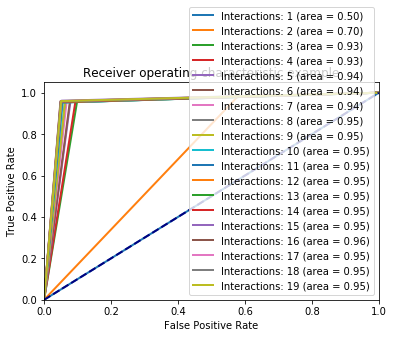

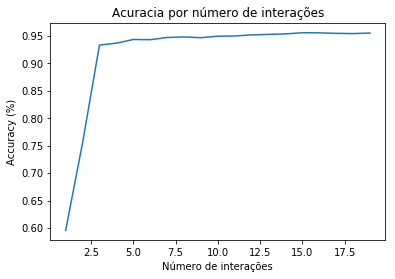

In [9]:
max_acc, max_pre, max_rec, roc_max, prec_r = [], [], [], [], -1

interactions = list(range(1,20))
plt_train_acc = []
for intr in interactions:
    acc_final, recall_final, precision_final, y_true_f, y_pred_f = [],[],[],[],[]
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_true = y_transf[train_index], y_transf[test_index]
        clf=GradientBoostingClassifier(n_estimators = intr)
        clf = clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred, average='macro')
        precision = precision_score(y_true, y_pred, average='macro')
        y_true_f.append(y_true)
        y_pred_f.append(y_pred)
        acc_final.append(acc)
        recall_final.append(recall)
        precision_final.append(precision)
    print('Número de interações: {}'.format(intr))
    prec_mean = np.mean(precision_final)
    ic_acc = st.t.interval(0.9, len(acc_final) - 1, loc=np.mean(acc_final), scale=st.sem(acc_final))
    ic_recall = st.t.interval(0.9, len(recall_final) - 1, loc=np.mean(recall_final), scale=st.sem(recall_final))
    ic_pre = st.t.interval(0.9, len(precision_final) - 1, loc=np.mean(precision_final), scale=st.sem(precision_final))
    print('Mean Accuracy[{:.4f}] IC [{:.4f}, {:.4f}]'.format(np.mean(acc_final), ic_acc[0], ic_acc[1]))
    print('Mean Recall[{:.4f}] IC [{:.4f}, {:.4f}]'.format(np.mean(recall_final), ic_recall[0], ic_recall[1]))
    print('Mean Precision[{:.4f}] IC [{:.4f}, {:.4f}]\n'.format(np.mean(precision_final), ic_pre[0], ic_pre[1]))
    plt_train_acc.append(sts.mean(acc_final))
    y_pred = np.concatenate(y_pred_f, axis=0)
    y_true = np.concatenate(y_true_f, axis=0)
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc_ = auc(fpr, tpr)
    if prec_mean > prec_r:
        prec_r = prec_mean
        max_acc, max_pre, max_rec, roc_max = [np.mean(acc_final),ic_acc], [prec_mean, ic_pre], [np.mean(recall_final), ic_recall], [fpr,tpr]

    lw = 2
    plt.plot(fpr, tpr,lw=lw, label='Interactions: '+str(intr)+' (area = %0.2f)' %auc_)
    
acc_conc.append(max_acc)
rec_conc.append(max_rec)
pre_conc.append(max_pre)
roc_conc.append(roc_max)      
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

fig, ax = plt.subplots()
ax.plot(interactions, plt_train_acc)
ax.set(xlabel='Número de interações', ylabel='Accuracy (%)',
       title='Acuracia por número de interações')
plt.show()

### Comparação Final

Gerar métricas e gráfico de comparação entre os melhores valores de cada método.

Naive Bayes
Mean Accuracy[0.9162] IC [0.9070, 0.9254]
Mean Recall[0.9249] IC [0.9164, 0.9335]
Mean Precision[0.9115] IC [0.9012, 0.9218]

Árvore de decisão
Mean Accuracy[0.9537] IC [0.9474, 0.9599]
Mean Recall[0.9542] IC [0.9474, 0.9610]
Mean Precision[0.9504] IC [0.9439, 0.9569]

SVM
Mean Accuracy[0.9139] IC [0.9012, 0.9266]
Mean Recall[0.9172] IC [0.9043, 0.9300]
Mean Precision[0.9083] IC [0.8939, 0.9228]

KNN
Mean Accuracy[0.7955] IC [0.7821, 0.8088]
Mean Recall[0.7979] IC [0.7870, 0.8089]
Mean Precision[0.7893] IC [0.7743, 0.8042]

Random Forest
Mean Accuracy[0.9700] IC [0.9589, 0.9811]
Mean Recall[0.9680] IC [0.9556, 0.9804]
Mean Precision[0.9694] IC [0.9579, 0.9808]

Gradient Tree Boosting
Mean Accuracy[0.9560] IC [0.9442, 0.9677]
Mean Recall[0.9545] IC [0.9416, 0.9673]
Mean Precision[0.9541] IC [0.9415, 0.9667]



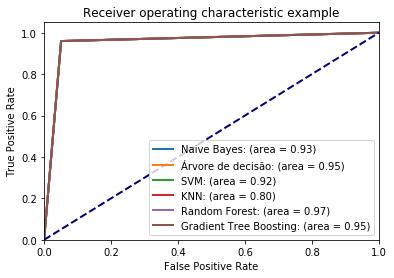

In [10]:
for i in range(0, len(methods)):
    print(methods[i])
    print('Mean Accuracy[{:.4f}] IC [{:.4f}, {:.4f}]'.format(acc_conc[i][0], acc_conc[i][1][0], acc_conc[i][1][1]))
    print('Mean Recall[{:.4f}] IC [{:.4f}, {:.4f}]'.format(rec_conc[i][0], rec_conc[i][1][0], rec_conc[i][1][1]))
    print('Mean Precision[{:.4f}] IC [{:.4f}, {:.4f}]\n'.format(pre_conc[i][0], pre_conc[i][1][0], pre_conc[i][1][1]))
    auc_ = auc(roc_conc[i][0], roc_conc[i][1])
    lw = 2
    plt.plot(fpr, tpr,lw=lw, label= methods[i]+': (area = %0.2f)' %auc_)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Análise e Comentários finais

Como abordado e visto durante o trabalho e a matéria é importante destacar que a ánalise de um bom classificador para um dado, deve-se analisar a natureza do dado e verificar o nível dos classificadores para não ter problema de sobreajuste.

Com base nas métricas da acuracia, precisão e seus intervalos de confiança foram selecionados os melhores hiperparâmetros de cada classificador. Os melhores classificadores foram comparados no gáfico anterior,  utilizando a media das 5 folds. O intervalo de confiança considerou uma distribuição padrão da média das métricas, utilizou probabilidade de noventa por cento.

O classificador escolhido foi o Random Forest, devido ao valor de acuracia, recall e precisão melhor que os outros, além de ter uma maior auc, considerando o protocolo apresentado anteriormente. Os valores estão muito próximos mas levando em conta o intervalo de confiança confirma essa superioridade.